In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
t = 25 + 273

In [3]:
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

In [4]:
working_area = pd.read_excel('tmp_ex.XLS',  sheetname='Sheet1')

working_area['mV'] = working_area.Term - working_area.Term[0]
working_area['T'] = working_area.mV/1000/(0.000001*41) + t
working_area['CuSigma'] = working_area.CuSize[0]/working_area.CuSize[1]/working_area.Cu
working_area['SemiSigma'] = working_area.SemiSize[0]/working_area.SemiSize[1]/working_area.Semi/1000
working_area['1/T'] = working_area['T']**(-1)
working_area['ln'] = np.log(working_area.SemiSigma)
del working_area['CuSize']
del working_area['SemiSize']


/home/danny/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


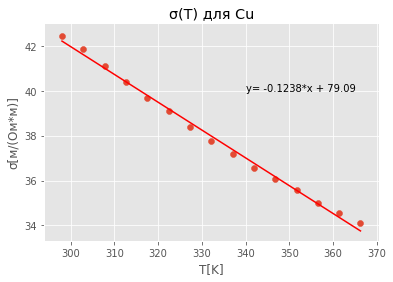

In [5]:
p = np.polyfit(working_area['T'], working_area['CuSigma'], 1)
yp = np.polyval(p, working_area['T'])
text = "y= "+str(toFixed(p[0], 4))+"*x + " + str(toFixed(p[1], 2))

plt.style.use('ggplot')
plt.plot(working_area['T'], yp, 'r', label='Approx')
plt.scatter(working_area['T'], working_area['CuSigma'])
plt.title('σ(T) для Cu')
plt.xlabel(u'T[K]')
plt.ylabel(u'σ[м/(Ом*м)]')
plt.text(340, 40, text)
plt.savefig('σ(T) для Cu.png', format='png', dpi=500)
#plt.show()

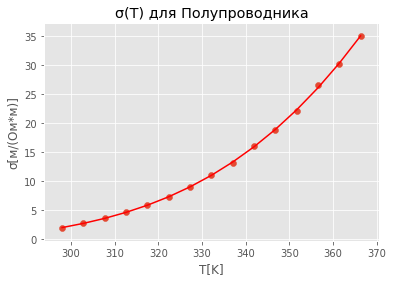

In [6]:
p = np.polyfit(working_area['T'], working_area['SemiSigma'], 3)
yp = np.polyval(p, working_area['T'])
text = "y= "+str(toFixed(p[0], 4))+"*x^3  " + str(toFixed(p[1], 2))+ "*x^2 + " + str(toFixed(p[2], 2)) + "*x^2  " + str(toFixed(p[3], 2))

plt.style.use('ggplot')
plt.plot(working_area['T'], yp, 'r', label='Approx')
plt.scatter(working_area['T'], working_area['SemiSigma'])
plt.title('σ(T) для Полупроводника')
plt.xlabel(u'T[K]')
plt.ylabel(u'σ[м/(Ом*м)]')
#plt.text(300, 30, text)
plt.savefig('σ(T) для Полупроводника.png', format='png', dpi=500)
#plt.show()

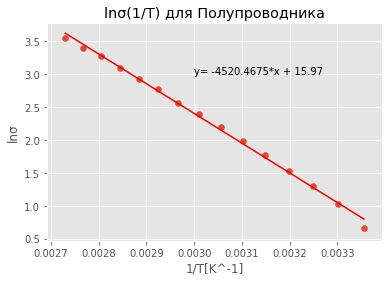

In [7]:
p = np.polyfit(working_area['1/T'], working_area['ln'], 1)
yp = np.polyval(p, working_area['1/T'])
text = "y= "+str(toFixed(p[0], 4))+"*x + " + str(toFixed(p[1], 2))

plt.style.use('ggplot')
plt.plot(working_area['1/T'], yp, 'r', label='Approx')
plt.scatter(working_area['1/T'], working_area['ln'])
plt.title('lnσ(1/T) для Полупроводника')
plt.xlabel(u'1/T[K^-1]')
plt.ylabel(u'lnσ')
plt.text(0.003, 3, text)
plt.savefig('ln.png', format='png', dpi=500)
#plt.show()

In [8]:
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    
    
    return ax

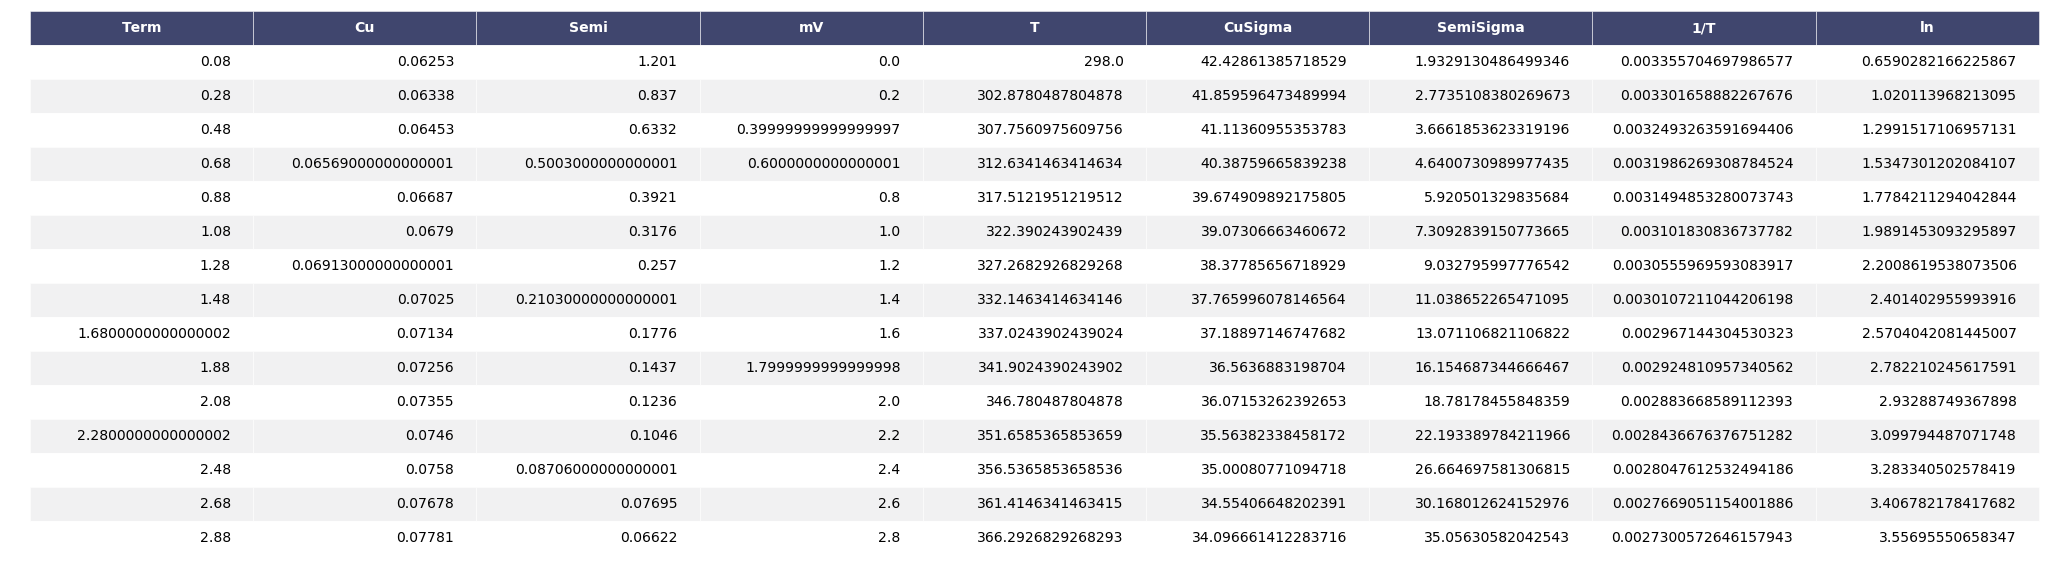

In [9]:
b = render_mpl_table(working_area, header_columns=0, col_width=4.0)
fig2 = b.get_figure()
fig2.savefig('table.png', format='png', dpi=100)